# Audiobook analysis

## Load libraries and data

In [1]:
from scone_phobia import apply_analysis
from scone_phobia.analyses.RL_AmEnglish import RL_AmEnglish as AE_RL
import scone_phobia.metadata.add_metadata as add_metadata
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
%load_ext rpy2.ipython

In [11]:
%%bash
cd scone-phobia/scone_phobia
python utils/precompute_mp_scores.py ../../results ../../mpscores
cd ../..

precompute_mp_scores.py: mp scores in pre-existing pickles in ../../mpscores will not be computed again, use the --overwrite switch if you want to force them to be computed again.


/Users/smiledra/Dropbox/Research/Summer2019/ABX_subpart/scone-phobia/scone_phobia/utils/mp_scores.py:39: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  kwargs['cfg'] = yaml.load(ymlfile)['results-file-columns']


In [12]:
# Local folder where minimal-pair scores have been computed.
mp_folder = './mpscores'

# select relevant models among all those potentially in mp_folder
filt = lambda mp_fname: True

# we launch analysis without resampling in this example.
df_rl = apply_analysis(AE_RL,
                       mp_folder,
                       filt=filt,
                       add_metadata=add_metadata.language_register,
                       resampling=False)

# change the condition labeled "final" to "1501" and then change this column to numeric
df_rl['condition'] = [x if x != 'final' else '1501' for x in df_rl['condition']]
df_rl['condition'] = pd.to_numeric(df_rl['condition'], downcast='integer')
df_rl['log(iteration)'] = df_rl['condition'].apply(lambda g: np.log(g))

df_rl['speaker_id'] = df_rl['language'] + df_rl['speaker']

# display the results Dataframe

df_rl.to_csv("0627_df_rl.csv")

df_rl.head()

/Users/smiledra/Dropbox/Research/Summer2019/ABX_subpart/scone-phobia/scone_phobia/utils/apply_analyses.py:55: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  kwargs['cfg'] = yaml.load(ymlfile)['primary-metadata']


,condition,contrast,corpus name,error,language,repetition,speaker,test language,test register,test set,training duration,training language,training register,training set,log(iteration),speaker_id
0,1501,L-R,librivox,10.986477,eng,1,10,American English,Spontaneous,BUC,full,American English,Read,librivoxeng,7.313887,eng10
1,1501,W-Y,librivox,5.326396,eng,1,10,American English,Spontaneous,BUC,full,American English,Read,librivoxeng,7.313887,eng10
2,1501,L-R,librivox,16.522439,jpn,2,00,American English,Read,WSJ,360,Japanese,Read,librivoxjpn,7.313887,jpn00
3,1501,W-Y,librivox,6.184648,jpn,2,00,American English,Read,WSJ,360,Japanese,Read,librivoxjpn,7.313887,jpn00
4,1501,L-R,librivox,11.340450,eng,6,06,American English,Spontaneous,BUC,3600,American English,Read,librivoxeng,7.313887,eng06


In [123]:
df_cluster = pd.read_csv("clusters_iterations_nospeed.csv") 

#df_cluster.loc[11]#.head()

cluster_long = pd.melt(df_cluster, id_vars=['model'],var_name='iter', value_name='cluster')
cluster_long['iter'] = pd.to_numeric(cluster_long['iter'], downcast='float')
cluster_long['log(iteration)'] = cluster_long['iter'].apply(lambda g: np.log(g))

cluster_long.to_csv("0627_cluster.csv")

cluster_long.head()

,model,iter,cluster,log(iteration)
0,eng00,1.0,10,0.0
1,jpn01,1.0,10,0.0
2,jpn02,1.0,10,0.0
3,jpn03,1.0,10,0.0
4,jpn04,1.0,10,0.0


## Analysis

Below, two speakers, eng01M and jpn00M are selected; A comparison of error rate vs. training iteration is shown.

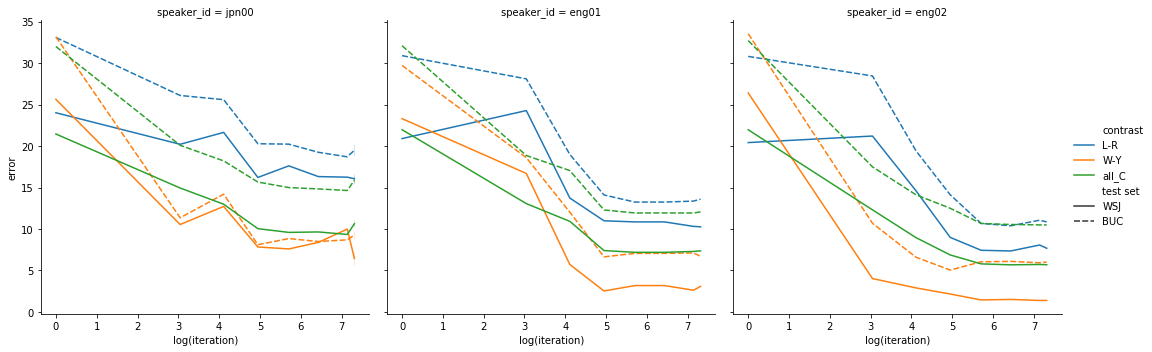

In [7]:
df_iter = pd.concat([df_rl[(df_rl['speaker_id']=='jpn00')], 
                     df_rl[(df_rl['speaker_id']=='eng01')],
                     df_rl[(df_rl['speaker_id']=='eng02')]])

g = sns.relplot(data=df_iter,
                x="log(iteration)", y="error",
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                style="test set",
                 #markers=True, dashes=False,
                kind = 'line',
                col = 'speaker_id',
                legend='full')

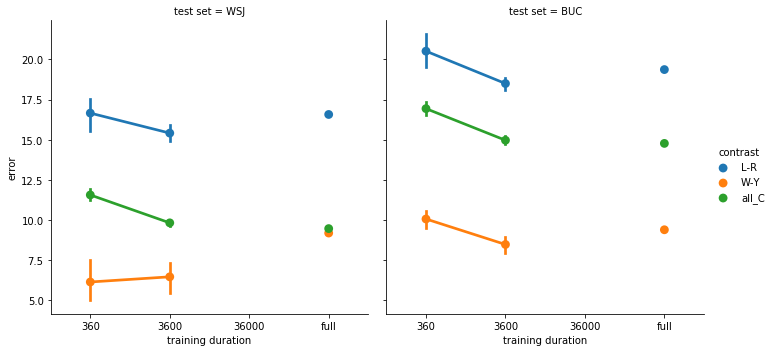

In [128]:
g = sns.catplot(x="training duration", y="error",
                order=['360', '3600', '36000', 'full'],
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                data=df_rl[(df_rl['speaker_id']=='jpn00') & (df_rl['condition']==1501)],
                kind="point",
                jitter=False,
                col = 'test set',
                legend=True)

#g.set_title("Error rate of eng07M")

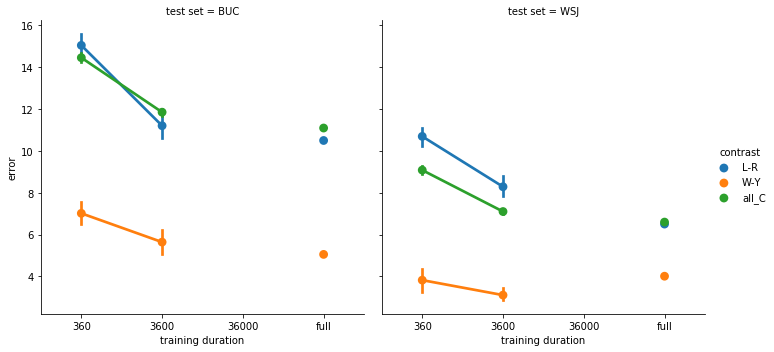

In [125]:
g = sns.catplot(x="training duration", y="error",
                order=['360', '3600', '36000', 'full'],
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                data=df_rl[(df_rl['speaker_id']=='eng06')],
                kind="point",
                jitter=False,
                col = 'test set',
                legend=True)

#g.set_title("Error rate of eng07M")

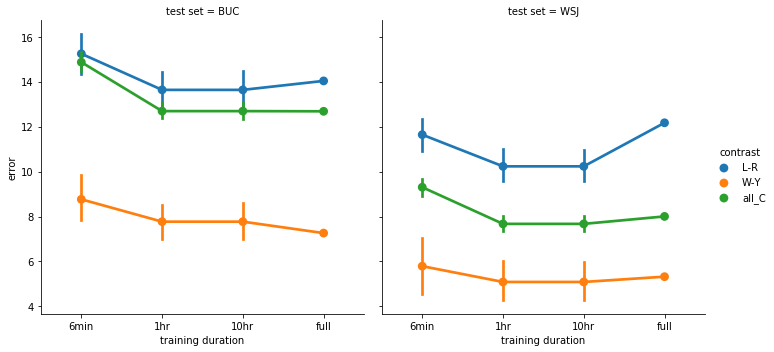

In [7]:
g = sns.catplot(x="training duration", y="error",
                order=['6min', '1hr', '10hr', 'full'],
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                data=df_rl[(df_rl['speaker_id']=='eng07')],
                kind="point",
                jitter=False,
                col = 'test set',
                legend=True)

#g.set_title("Error rate of eng07M")

In [4]:
df_eng07seg = df_rl[(df_rl['speaker_id']=='eng06')]

g = sns.catplot(x="training duration", y="error",
                order=['6min', '1hr', '10hr', 'full'],
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                data=df_eng07seg,
                kind="point",
                jitter=False,
                col = 'test set',
                legend=True)

## Overall analysis

The analysis below is the overall error rate, plotted by training language and test set. 

TODO: eng02F data still pending; examine eng06, eng07 to see if they need to be excluded. 

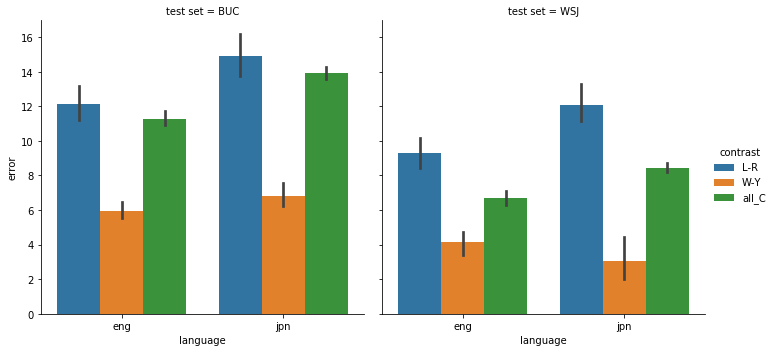

In [10]:
# plot the results
g = sns.catplot(x="language", y="error",
                hue="contrast", hue_order=['L-R', 'W-Y', 'all_C'],
                data = df_rl[(df_rl['condition']==1501)&(df_rl['training duration']=='full')],
                kind="bar",
                #kind="strip", jitter=False,
                #kind='point',
                #kind='box',
                order=['eng', 'jpn'],
                col='test set',
                legend=True)

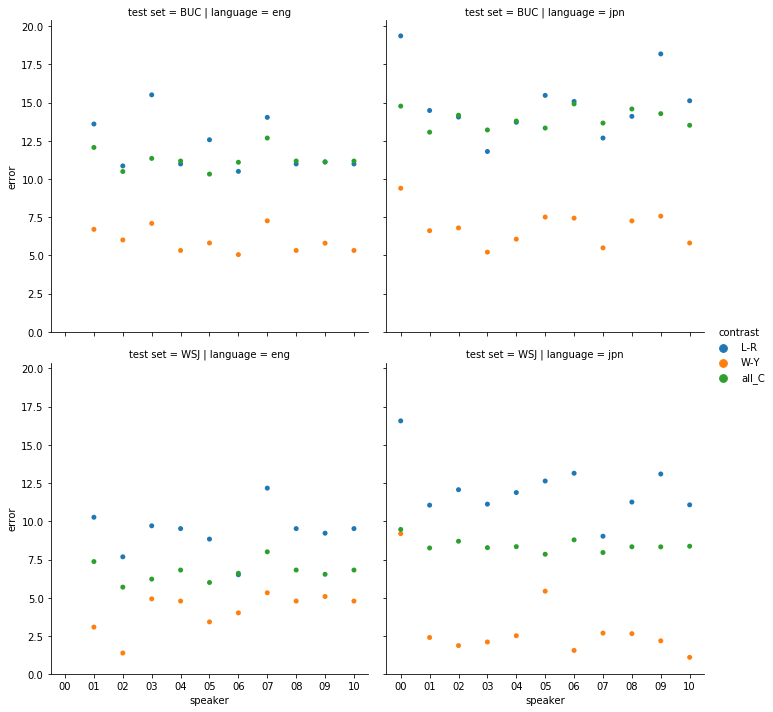

In [9]:
g = sns.catplot(x="speaker", y="error", hue="contrast",
                data=df_rl[(df_rl['condition']==1501) & (df_rl['training duration']=='full')],
                    kind="strip",
                    jitter=False,
                    hue_order=['L-R', 'W-Y', 'all_C'],
                    col = 'language',
                    row = 'test set',
                    legend=True)

,model,1,21,61,141,301,621,1261,1501
0,eng00,10,16,104,2403,9910,10355,10506,10537
1,jpn01,10,15,91,664,771,778,787,787
2,jpn02,10,25,139,556,583,589,594,594
3,jpn03,10,16,83,541,610,617,623,624
4,jpn04,10,16,125,555,593,600,603,604


,model,iter,cluster
0,eng00,1,10
1,jpn01,1,10
2,jpn02,1,10
3,jpn03,1,10
4,jpn04,1,10
